In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import skimage
import sklearn
import pandas as pd
import scipy

from tqdm import tqdm, tqdm_notebook 

In [2]:
import os
import glob

dataset_path = './dataset_new/'
train_path = os.path.join(dataset_path,'train','*','*')
test_path = os.path.join(dataset_path,'test','*')

train_files = glob.glob(train_path)
test_files = glob.glob(test_path)

print(str(len(train_files)) + ' training files')
print(str(len(test_files)) + ' test files')

10000 training files
12500 test files


Random image: ./dataset_new/train/dogs/dog.3635.jpg


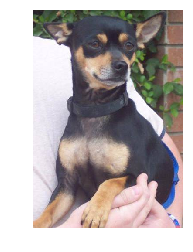

In [3]:
import random
import skimage.io

random_file = random.choice(train_files)
print('Random image: ' + random_file)

img = skimage.io.imread(random_file)

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

8.552128372040629e-06


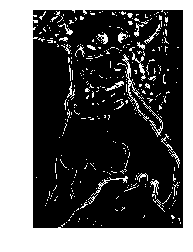

In [4]:
from skimage.filters import gaussian, laplace
from skimage.exposure import adjust_gamma,equalize_hist
from skimage.color import rgb2gray
from scipy.ndimage.filters import gaussian_filter
from skimage import img_as_float
from skimage.filters import threshold_mean


img_ = rgb2gray(img)

#sigma = [4,8,16]
img_ = gaussian_filter(img_,sigma=3)
img_ = equalize_hist(img_)
img_ = laplace(img_,ksize=3)
#img_laplace *= 255.0/img_laplace.max()
#img_laplace = np.array(img_laplace, dtype=np.uint8)
thresh = threshold_mean(img_)
img_ = img_ > 0.0082
print(thresh)

#img_gauss = gaussian_filter(img_gray,sigma=random.choice(sigma))
#img_adjgamma = adjust_gamma(img_gray,2)
#img_gauss = gaussian(img_gray,sigma=sigma,multichannel=True)
#img_eqhist = equalize_hist(img_gray)

#plt.imshow(img_as_float(img_gauss),cmap="gray")
plt.axis('off')
plt.imshow(img_,cmap="gray")
plt.show()

#skimage.io.imsave('./gauss.png',img_gauss)

In [6]:
sets = [train_files, test_files]
set_prefixes = ['Laplace on Training', 'Laplace on Test']

for prefix, set_ in zip(set_prefixes,sets):
    
    for file in tqdm_notebook(set_, desc=prefix):
        img = skimage.io.imread(file)
        img_gray = rgb2gray(img)
        #sigma = 8
        #img_adjgamma = adjust_gamma(img_gray,0.5)
        #img_gauss = gaussian(img_gray,sigma=sigma,multichannel=True)
        img_laplace = laplace(img_gray,ksize=3)

        #plt.imshow(img_eqhist,cmap="gray")
        #plt.show()
        path = file.replace('dataset_new','dataset_laplace')
        folder = os.path.dirname(os.path.abspath(path))
        if not os.path.exists(folder):
            os.makedirs(folder)
        #print(path)
        img_laplace *= 255.0/img_laplace.max()
        img_laplace = np.array(img_laplace, dtype=np.uint8)
        skimage.io.imsave(path,img_laplace)

In [7]:
set_prefixes = ['Equalize_hist on Training', 'Equalize_hist on Test']

for prefix, set_ in zip(set_prefixes,sets):
    
    for file in tqdm_notebook(set_, desc=prefix):
        img = skimage.io.imread(file)
        img_gray = rgb2gray(img)
        #sigma = 8
        #img_adjgamma = adjust_gamma(img_gray,0.5)
        #img_gauss = gaussian(img_gray,sigma=sigma,multichannel=True)
        img_eqhist = equalize_hist(img_gray)

        #plt.imshow(img_eqhist,cmap="gray")
        #plt.show()
        path = file.replace('dataset_new','dataset_hist')
        folder = os.path.dirname(os.path.abspath(path))
        if not os.path.exists(folder):
            os.makedirs(folder)
        #print(path)
        skimage.io.imsave(path,img_eqhist)

In [9]:
set_prefixes = ['Gamma on Training', 'Gamma on Test']

for prefix, set_ in zip(set_prefixes,sets):
    
    for file in tqdm_notebook(set_, desc=prefix):
        img = skimage.io.imread(file)
        img_gray = rgb2gray(img)
        #sigma = 8
        gamma_values = [0.1,2,4]
        for gamma in gamma_values:
            img_adjgamma = adjust_gamma(img_gray,gamma)
            path = file.replace('dataset_new','dataset_eqGamma')
            folder = os.path.dirname(os.path.abspath(path))
            if not os.path.exists(folder):
                os.makedirs(folder)
            filename = os.path.basename(path)
            new_filename = os.path.splitext(filename)[0]+'gamma'+str(gamma)+os.path.splitext(filename)[1]
            new_path = os.path.join(folder,new_filename)
            #print(new_path)
            skimage.io.imsave(new_path,img_adjgamma)

In [10]:
set_prefixes = ['Gaussian on Training', 'Gaussian on Test']

for prefix, set_ in zip(set_prefixes,sets):
    
    for file in tqdm_notebook(set_, desc=prefix):
        img = skimage.io.imread(file)
        img_gray = rgb2gray(img)

        sigma = [2,4,8,16]
        img_gauss = gaussian_filter(img_gray,sigma=random.choice(sigma))

        path = file.replace('dataset_new','dataset_gauss')
        folder = os.path.dirname(os.path.abspath(path))
        if not os.path.exists(folder):
            os.makedirs(folder)
        #print(path)
        img_gauss = np.array(img_gauss, dtype=np.float32)
        skimage.io.imsave(path,img_gauss)